In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [69]:
path=input("enter the path of movie_metadata.csv")

enter the path of movie_metadata.csv/home/anant/Downloads/movie_rating_prediction-master/movie_metadata.csv


In [70]:
df = pd.read_csv(path)

In [71]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
df.dropna(inplace=True)

## Histogram of Imdb rating

Text(0.5, 1.0, 'Distribution of Movie Ratings')

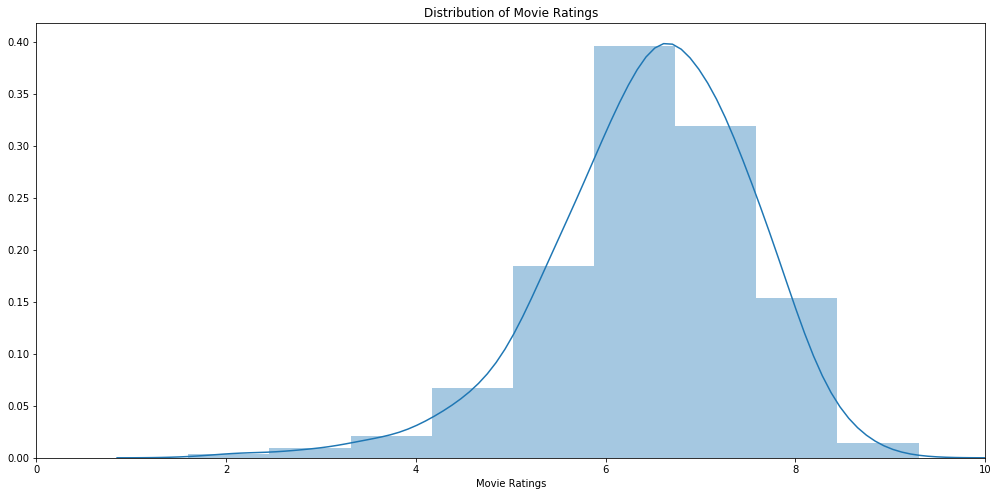

In [7]:
plt.figure(figsize=(17,8))
ax = sns.distplot(df['imdb_score'], bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Movie Ratings')
ax.set(xlim=(0, 10))
ax.set_title("Distribution of Movie Ratings")

In [8]:
movie_ratings = df[['imdb_score', 'budget', 'num_critic_for_reviews','duration','gross',
                    'num_voted_users','cast_total_facebook_likes', 'movie_facebook_likes',
                   'num_user_for_reviews','title_year']]

In [9]:
movie_ratings = movie_ratings.dropna()

### Pair Plot

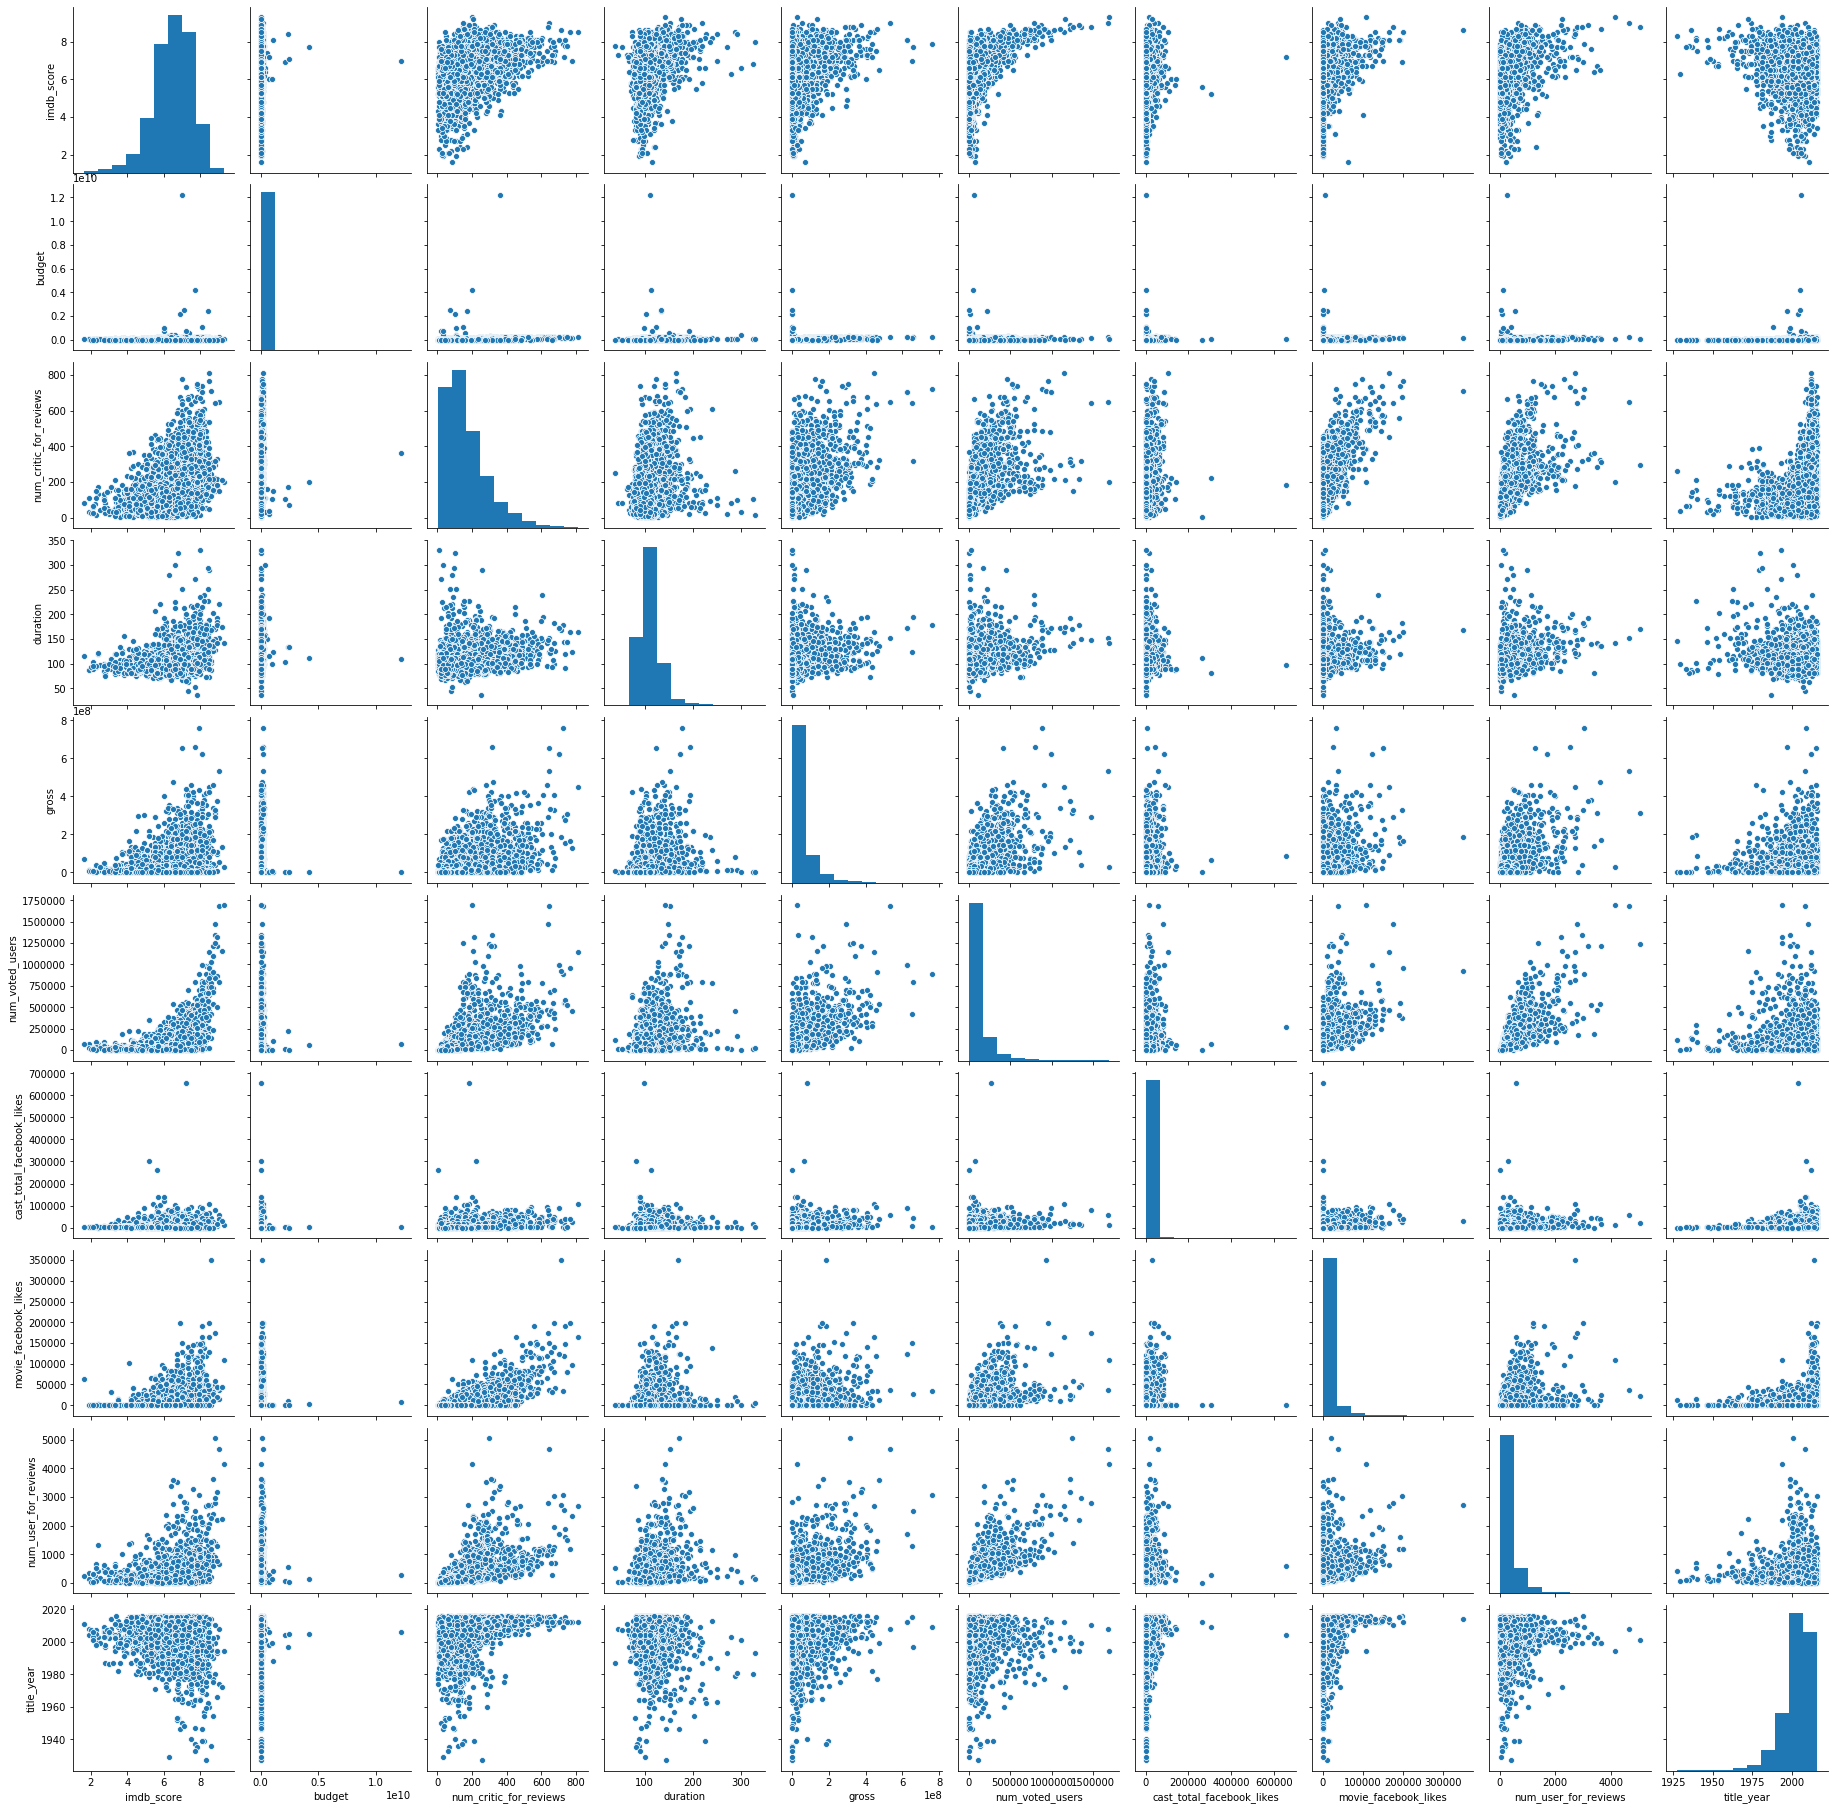

In [10]:
sns.pairplot(movie_ratings[['imdb_score', 'budget', 'num_critic_for_reviews','duration','gross',
                    'num_voted_users','cast_total_facebook_likes', 'movie_facebook_likes',
                   'num_user_for_reviews','title_year']])

## Joint Plot imdb rating vs budget

Text(0.5, 1, 'imdb rating vs budget')

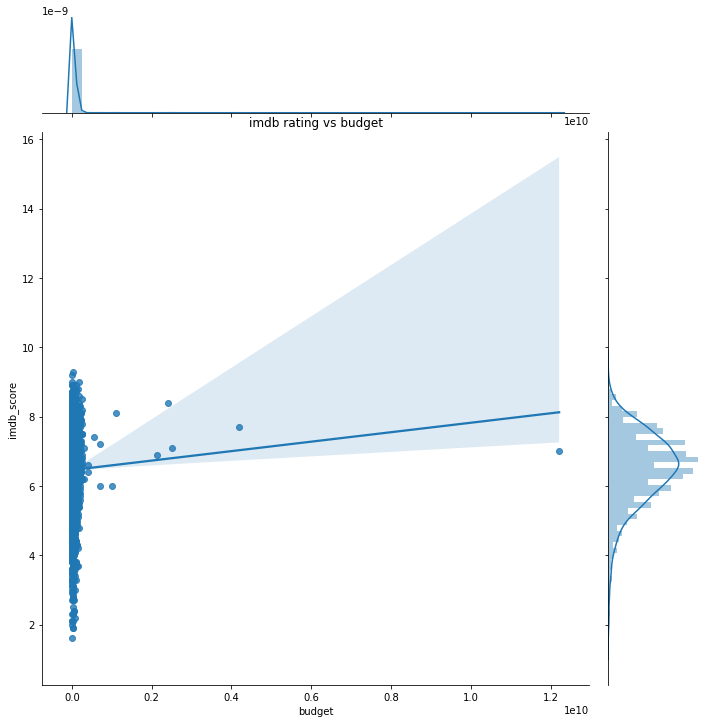

In [11]:
sns.jointplot(x='budget', y='imdb_score', data=movie_ratings, kind='reg', size=10)
plt.xlabel('budget')
plt.ylabel('imdb_score')
plt.title('imdb rating vs budget')

## Joint Plot imdb rating vs gross

Text(0.5, 1, 'imdb rating vs gross')

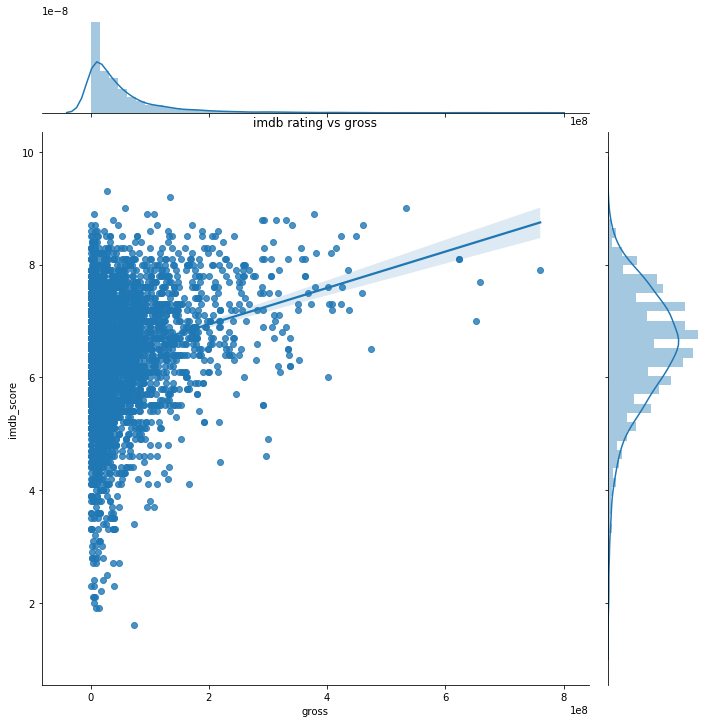

In [12]:
sns.jointplot(x='gross', y='imdb_score', data=movie_ratings, kind='reg', size=10)
plt.xlabel('gross')
plt.ylabel('imdb_score')
plt.title('imdb rating vs gross')

In [13]:
movie_ratings.columns

Index(['imdb_score', 'budget', 'num_critic_for_reviews', 'duration', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'movie_facebook_likes',
       'num_user_for_reviews', 'title_year'],
      dtype='object')

## Joint Plot imdb rating vs num_critic_for_reviews

Text(0.5, 1, 'imdb rating vs num_critic_for_reviews')

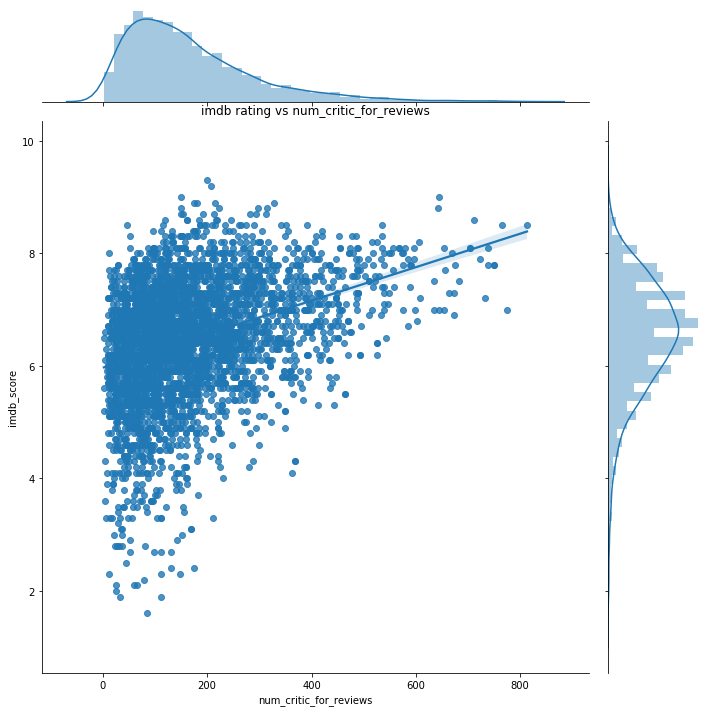

In [14]:
sns.jointplot(x='num_critic_for_reviews', y='imdb_score', data=movie_ratings, kind='reg', size=10)
plt.xlabel('num_critic_for_reviews')
plt.ylabel('imdb_score')
plt.title('imdb rating vs num_critic_for_reviews')

## Joint Plot imdb rating vs duration

Text(0.5, 1, 'imdb rating vs duration')

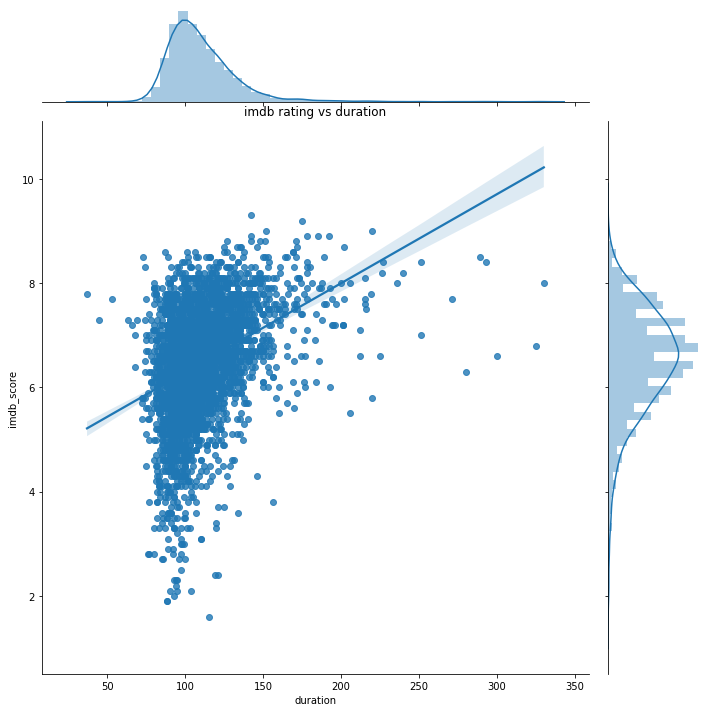

In [15]:
sns.jointplot(x='duration', y='imdb_score', data=movie_ratings, kind='reg', size=10)
plt.xlabel('duration')
plt.ylabel('imdb_score')
plt.title('imdb rating vs duration')

## Joint Plot imdb rating vs num_user_for_reviews

Text(0.5, 1, 'imdb rating vs num_user_for_reviews')

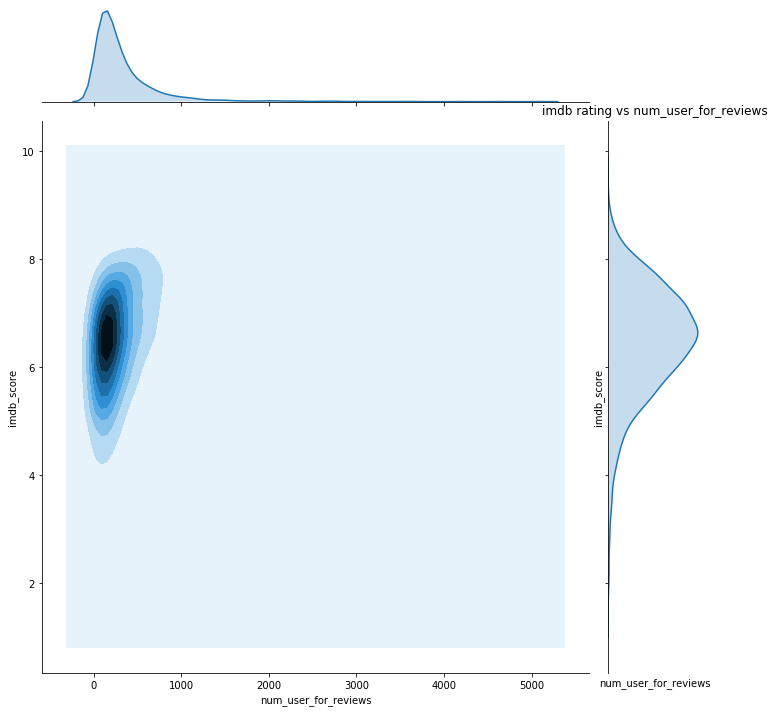

In [16]:
sns.jointplot(x='num_user_for_reviews', y='imdb_score', data=movie_ratings, kind='kde', size=10)
plt.xlabel('num_user_for_reviews')
plt.ylabel('imdb_score')
plt.title('imdb rating vs num_user_for_reviews')

In [17]:
movie_ratings.columns

Index(['imdb_score', 'budget', 'num_critic_for_reviews', 'duration', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'movie_facebook_likes',
       'num_user_for_reviews', 'title_year'],
      dtype='object')

## Joint Plot imdb rating vs title year

Text(0.5, 1, 'imdb rating vs title_year')

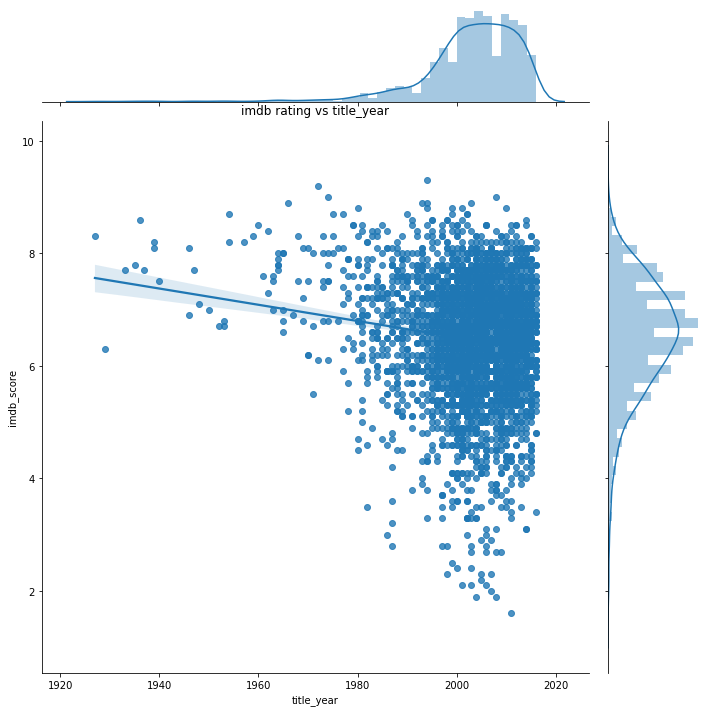

In [18]:
sns.jointplot(x='title_year', y='imdb_score', data=movie_ratings, kind='reg', size=10)
plt.xlabel('title_year')
plt.ylabel('imdb_score')
plt.title('imdb rating vs title_year')

#### as per my observation these feature has no or the least impact on the movie rating so droping these column

In [19]:
df=df.drop(columns=['movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords',
                    'actor_3_name','movie_imdb_link','aspect_ratio','language'])

### Replacing string value with float value

In [20]:
df.columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['content_rating']=le.fit_transform(df['content_rating'].values)
df['director_name']=le.fit_transform(df['director_name'].values)
df['genres']=le.fit_transform(df['genres'].values)

df['actor_1_name']=le.fit_transform(df['actor_1_name'].values)
df['actor_2_name']=le.fit_transform(df['actor_2_name'].values)

In [21]:
df['country']=le.fit_transform(df['country'].values)

### Spliting feature (x) and value to be predicted(y)

In [22]:
y=df['imdb_score'].values

In [23]:
x=df.loc[:, df.columns != 'imdb_score'].values

In [24]:
df.head

<bound method NDFrame.head of       director_name  num_critic_for_reviews  duration  \
0               620                   723.0     178.0   
1               538                   302.0     169.0   
2              1395                   602.0     148.0   
3               251                   813.0     164.0   
5                62                   462.0     132.0   
...             ...                     ...       ...   
5026           1167                    81.0     110.0   
5027            612                    64.0      90.0   
5033           1425                   143.0      77.0   
5035           1343                    56.0      81.0   
5042            791                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
0                         0.0                   855.0          1002   
1                       563.0                  1000.0          1592   
2                         0.0                   161.0          1795   
3

## prediction

In [25]:
X_train, X_test, Y_trian, Y_test= train_test_split(x,y, test_size=0.2, random_state=0)

#### Random Forest

In [26]:
randregrssor=RandomForestRegressor(n_estimators=50)

In [27]:
randregrssor.fit(X_train,Y_trian)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [28]:
predictions = randregrssor.predict(X_test)

In [29]:
errors = abs(predictions - Y_test)

In [30]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.52 degrees.


In [31]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
    

Accuracy: 90.49 %.


(0, 10)

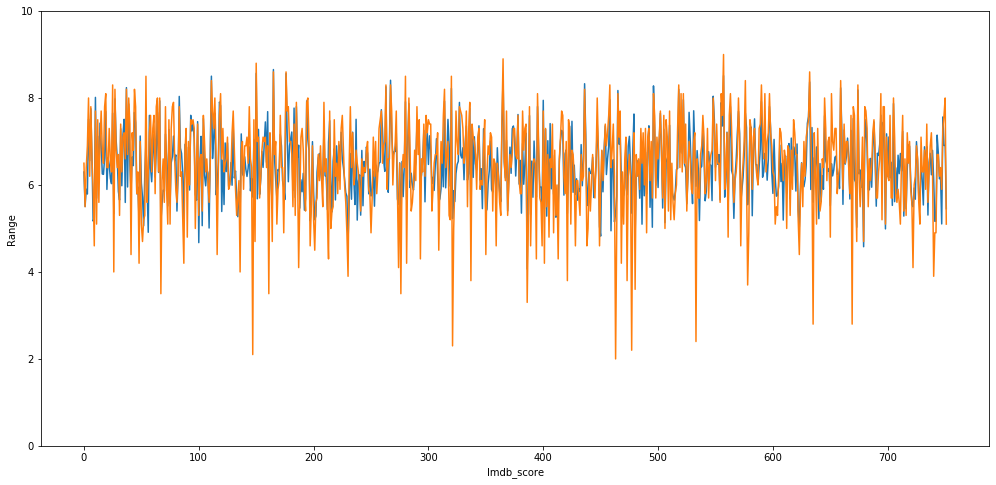

In [32]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

#### Decision Tree

In [33]:
dr=DecisionTreeRegressor()

In [34]:
dr.fit(X_train,Y_trian)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
predictions = dr.predict(X_test)

In [36]:
errors = abs(predictions - Y_test)

In [37]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.73 degrees.


In [38]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
    

Accuracy: 87.2 %.


(0, 10)

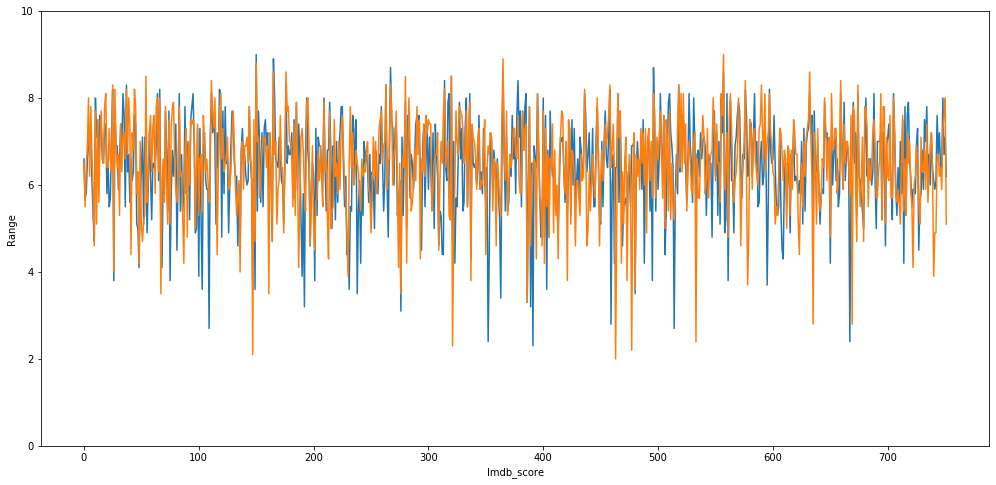

In [39]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

#### Support Vector Machine

In [40]:
svm=SVR()

In [41]:
svm.fit(X_train,Y_trian)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
predictions = svm.predict(X_test)

In [43]:
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
    

Mean Absolute Error: 0.82 degrees.
Accuracy: 85.18 %.


(0, 10)

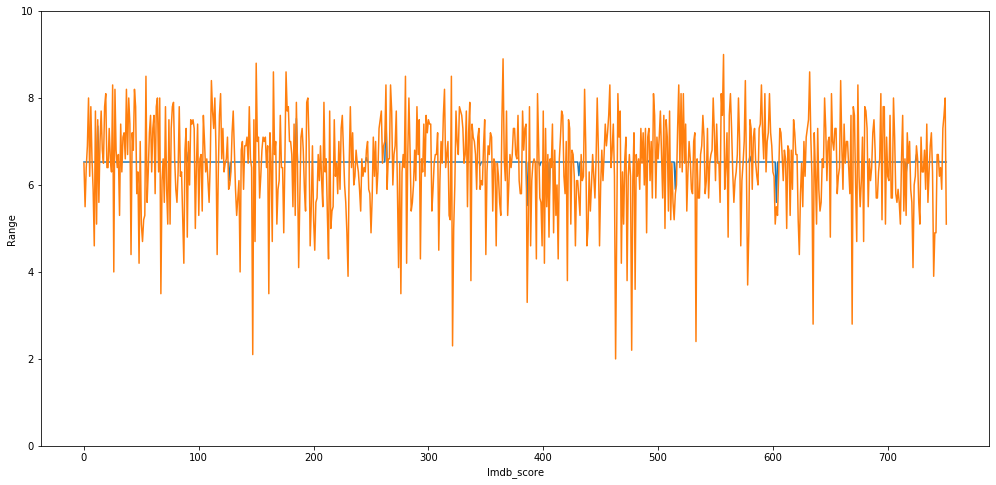

In [44]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

#### XG Boost

In [63]:
from xgboost import XGBRegressor

In [64]:
xgboost=XGBRegressor(n_estimators=50)

In [65]:
xgboost.fit(X_train,Y_trian)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [66]:
predictions=xgboost.predict(X_test)

In [67]:
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.53 degrees.
Accuracy: 90.3 %.


(0, 10)

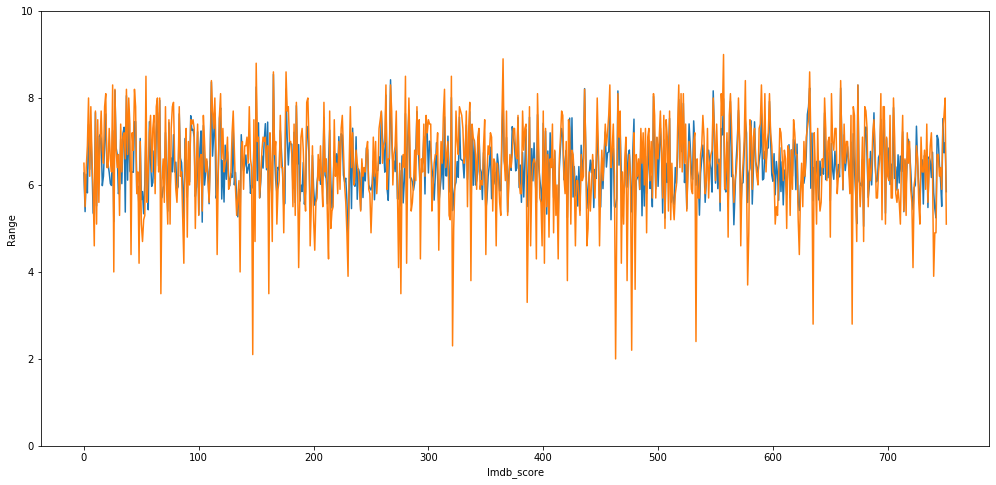

In [68]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

### I would chose random forest model for the production as it has the least mean abs error. XG boost performance is similar to that of random forest but still it didnot achieve same accuracy.

In [52]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2560      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 167,425
Trainable params: 167,425
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(X_train, Y_trian, epochs=500, batch_size=32, validation_split = 0.2)

Train on 2403 samples, validate on 601 samples
Epoch 1/500
2403/2403 [==============================] - 0s 137us/step - loss: 56644.5618 - mean_absolute_error: 56644.5547 - val_loss: 35426.6551 - val_mean_absolute_error: 35426.6562
Epoch 2/500
2403/2403 [==============================] - 0s 89us/step - loss: 8223.6025 - mean_absolute_error: 8223.6035 - val_loss: 14949.7428 - val_mean_absolute_error: 14949.7402
Epoch 3/500
2403/2403 [==============================] - 0s 91us/step - loss: 4865.0314 - mean_absolute_error: 4865.0298 - val_loss: 5066.9494 - val_mean_absolute_error: 5066.9497
Epoch 4/500
2403/2403 [==============================] - 0s 92us/step - loss: 2542.7609 - mean_absolute_error: 2542.7610 - val_loss: 1674.2945 - val_mean_absolute_error: 1674.2946
Epoch 5/500
2403/2403 [==============================] - 0s 94us/step - loss: 1304.0675 - mean_absolute_error: 1304.0676 - val_loss: 2258.7207 - val_mean_absolute_error: 2258.7205
Epoch 6/500
2403/2403 [=======================

2403/2403 [==============================] - 0s 91us/step - loss: 0.8172 - mean_absolute_error: 0.8172 - val_loss: 0.8069 - val_mean_absolute_error: 0.8069
Epoch 48/500
2403/2403 [==============================] - 0s 95us/step - loss: 0.8238 - mean_absolute_error: 0.8238 - val_loss: 0.8246 - val_mean_absolute_error: 0.8246
Epoch 49/500
2403/2403 [==============================] - 0s 105us/step - loss: 0.8176 - mean_absolute_error: 0.8176 - val_loss: 0.8037 - val_mean_absolute_error: 0.8037
Epoch 50/500
2403/2403 [==============================] - 0s 101us/step - loss: 0.8225 - mean_absolute_error: 0.8225 - val_loss: 0.8152 - val_mean_absolute_error: 0.8152
Epoch 51/500
2403/2403 [==============================] - 0s 88us/step - loss: 0.8156 - mean_absolute_error: 0.8156 - val_loss: 0.8049 - val_mean_absolute_error: 0.8049
Epoch 52/500
2403/2403 [==============================] - 0s 91us/step - loss: 0.8881 - mean_absolute_error: 0.8881 - val_loss: 0.8033 - val_mean_absolute_error: 0.80

2403/2403 [==============================] - 0s 89us/step - loss: 0.8122 - mean_absolute_error: 0.8122 - val_loss: 0.7982 - val_mean_absolute_error: 0.7982
Epoch 96/500
2403/2403 [==============================] - 0s 92us/step - loss: 0.8181 - mean_absolute_error: 0.8181 - val_loss: 0.7975 - val_mean_absolute_error: 0.7975
Epoch 97/500
2403/2403 [==============================] - 0s 90us/step - loss: 0.8121 - mean_absolute_error: 0.8121 - val_loss: 0.7991 - val_mean_absolute_error: 0.7991
Epoch 98/500
2403/2403 [==============================] - 0s 87us/step - loss: 0.8355 - mean_absolute_error: 0.8355 - val_loss: 0.7985 - val_mean_absolute_error: 0.7985
Epoch 99/500
2403/2403 [==============================] - 0s 91us/step - loss: 0.8563 - mean_absolute_error: 0.8563 - val_loss: 0.7980 - val_mean_absolute_error: 0.7980
Epoch 100/500
2403/2403 [==============================] - 0s 88us/step - loss: 0.8207 - mean_absolute_error: 0.8207 - val_loss: 0.7987 - val_mean_absolute_error: 0.798

2403/2403 [==============================] - 0s 92us/step - loss: 0.8123 - mean_absolute_error: 0.8123 - val_loss: 0.7979 - val_mean_absolute_error: 0.7979
Epoch 144/500
2403/2403 [==============================] - 0s 93us/step - loss: 0.8121 - mean_absolute_error: 0.8121 - val_loss: 0.7983 - val_mean_absolute_error: 0.7983
Epoch 145/500
2403/2403 [==============================] - 0s 89us/step - loss: 0.8121 - mean_absolute_error: 0.8121 - val_loss: 0.7978 - val_mean_absolute_error: 0.7978
Epoch 146/500
2403/2403 [==============================] - 0s 91us/step - loss: 0.8121 - mean_absolute_error: 0.8121 - val_loss: 0.7971 - val_mean_absolute_error: 0.7971
Epoch 147/500
2403/2403 [==============================] - 0s 90us/step - loss: 0.8123 - mean_absolute_error: 0.8123 - val_loss: 0.7989 - val_mean_absolute_error: 0.7989
Epoch 148/500
2403/2403 [==============================] - 0s 89us/step - loss: 0.8120 - mean_absolute_error: 0.8120 - val_loss: 0.7988 - val_mean_absolute_error: 0

2403/2403 [==============================] - 0s 92us/step - loss: 0.8123 - mean_absolute_error: 0.8123 - val_loss: 0.7984 - val_mean_absolute_error: 0.7984
Epoch 192/500
2403/2403 [==============================] - 0s 96us/step - loss: 0.8122 - mean_absolute_error: 0.8122 - val_loss: 0.7968 - val_mean_absolute_error: 0.7968
Epoch 193/500
2403/2403 [==============================] - 0s 104us/step - loss: 0.8127 - mean_absolute_error: 0.8127 - val_loss: 0.7973 - val_mean_absolute_error: 0.7973
Epoch 194/500
2403/2403 [==============================] - 0s 107us/step - loss: 0.8120 - mean_absolute_error: 0.8120 - val_loss: 0.7967 - val_mean_absolute_error: 0.7967
Epoch 195/500
2403/2403 [==============================] - 0s 89us/step - loss: 0.8123 - mean_absolute_error: 0.8123 - val_loss: 0.7974 - val_mean_absolute_error: 0.7974
Epoch 196/500
2403/2403 [==============================] - 0s 100us/step - loss: 0.8122 - mean_absolute_error: 0.8122 - val_loss: 0.7974 - val_mean_absolute_error

2403/2403 [==============================] - 0s 80us/step - loss: 0.8126 - mean_absolute_error: 0.8126 - val_loss: 0.7972 - val_mean_absolute_error: 0.7972
Epoch 240/500
2403/2403 [==============================] - 0s 99us/step - loss: 0.8125 - mean_absolute_error: 0.8125 - val_loss: 0.7974 - val_mean_absolute_error: 0.7974
Epoch 241/500
2403/2403 [==============================] - 0s 97us/step - loss: 0.8124 - mean_absolute_error: 0.8124 - val_loss: 0.7986 - val_mean_absolute_error: 0.7986
Epoch 242/500
2403/2403 [==============================] - 0s 80us/step - loss: 0.8127 - mean_absolute_error: 0.8127 - val_loss: 0.7968 - val_mean_absolute_error: 0.7968
Epoch 243/500
2403/2403 [==============================] - 0s 80us/step - loss: 0.8123 - mean_absolute_error: 0.8123 - val_loss: 0.7969 - val_mean_absolute_error: 0.7969
Epoch 244/500
2403/2403 [==============================] - 0s 80us/step - loss: 0.8121 - mean_absolute_error: 0.8121 - val_loss: 0.7984 - val_mean_absolute_error: 0

2403/2403 [==============================] - 0s 66us/step - loss: 0.8122 - mean_absolute_error: 0.8122 - val_loss: 0.7976 - val_mean_absolute_error: 0.7976
Epoch 288/500
2403/2403 [==============================] - 0s 67us/step - loss: 0.8129 - mean_absolute_error: 0.8129 - val_loss: 0.7955 - val_mean_absolute_error: 0.7955
Epoch 289/500
2403/2403 [==============================] - 0s 66us/step - loss: 0.8126 - mean_absolute_error: 0.8126 - val_loss: 0.7979 - val_mean_absolute_error: 0.7979
Epoch 290/500
2403/2403 [==============================] - 0s 66us/step - loss: 0.8143 - mean_absolute_error: 0.8143 - val_loss: 0.7962 - val_mean_absolute_error: 0.7962
Epoch 291/500
2403/2403 [==============================] - 0s 67us/step - loss: 0.8120 - mean_absolute_error: 0.8120 - val_loss: 0.7964 - val_mean_absolute_error: 0.7964
Epoch 292/500
2403/2403 [==============================] - 0s 67us/step - loss: 0.8137 - mean_absolute_error: 0.8137 - val_loss: 0.7979 - val_mean_absolute_error: 0

2403/2403 [==============================] - 0s 66us/step - loss: 0.8175 - mean_absolute_error: 0.8175 - val_loss: 0.7970 - val_mean_absolute_error: 0.7970
Epoch 336/500
2403/2403 [==============================] - 0s 65us/step - loss: 0.8227 - mean_absolute_error: 0.8227 - val_loss: 0.8070 - val_mean_absolute_error: 0.8070
Epoch 337/500
2403/2403 [==============================] - 0s 67us/step - loss: 0.8130 - mean_absolute_error: 0.8130 - val_loss: 0.7969 - val_mean_absolute_error: 0.7969
Epoch 338/500
2403/2403 [==============================] - 0s 66us/step - loss: 0.8139 - mean_absolute_error: 0.8139 - val_loss: 0.7983 - val_mean_absolute_error: 0.7983
Epoch 339/500
2403/2403 [==============================] - 0s 66us/step - loss: 0.8140 - mean_absolute_error: 0.8140 - val_loss: 0.7965 - val_mean_absolute_error: 0.7965
Epoch 340/500
2403/2403 [==============================] - 0s 66us/step - loss: 0.8159 - mean_absolute_error: 0.8159 - val_loss: 0.7970 - val_mean_absolute_error: 0

2403/2403 [==============================] - 0s 67us/step - loss: 0.8145 - mean_absolute_error: 0.8145 - val_loss: 0.7972 - val_mean_absolute_error: 0.7972
Epoch 384/500
2403/2403 [==============================] - 0s 66us/step - loss: 0.8151 - mean_absolute_error: 0.8151 - val_loss: 0.7980 - val_mean_absolute_error: 0.7980
Epoch 385/500
2403/2403 [==============================] - 0s 65us/step - loss: 0.8143 - mean_absolute_error: 0.8143 - val_loss: 0.7963 - val_mean_absolute_error: 0.7963
Epoch 386/500
2403/2403 [==============================] - 0s 66us/step - loss: 0.8154 - mean_absolute_error: 0.8154 - val_loss: 0.7963 - val_mean_absolute_error: 0.7963
Epoch 387/500
2403/2403 [==============================] - 0s 65us/step - loss: 0.8172 - mean_absolute_error: 0.8172 - val_loss: 0.7978 - val_mean_absolute_error: 0.7978
Epoch 388/500
2403/2403 [==============================] - 0s 66us/step - loss: 0.8155 - mean_absolute_error: 0.8155 - val_loss: 0.8060 - val_mean_absolute_error: 0

2403/2403 [==============================] - 0s 79us/step - loss: 0.8143 - mean_absolute_error: 0.8143 - val_loss: 0.7970 - val_mean_absolute_error: 0.7970
Epoch 432/500
2403/2403 [==============================] - 0s 81us/step - loss: 0.8200 - mean_absolute_error: 0.8200 - val_loss: 0.7992 - val_mean_absolute_error: 0.7992
Epoch 433/500
2403/2403 [==============================] - 0s 79us/step - loss: 0.8153 - mean_absolute_error: 0.8153 - val_loss: 0.7965 - val_mean_absolute_error: 0.7965
Epoch 434/500
2403/2403 [==============================] - 0s 65us/step - loss: 0.8158 - mean_absolute_error: 0.8158 - val_loss: 0.7990 - val_mean_absolute_error: 0.7990
Epoch 435/500
2403/2403 [==============================] - 0s 69us/step - loss: 0.8135 - mean_absolute_error: 0.8135 - val_loss: 0.7971 - val_mean_absolute_error: 0.7971
Epoch 436/500
2403/2403 [==============================] - 0s 68us/step - loss: 0.8166 - mean_absolute_error: 0.8166 - val_loss: 0.7965 - val_mean_absolute_error: 0

2403/2403 [==============================] - 0s 80us/step - loss: 0.8156 - mean_absolute_error: 0.8156 - val_loss: 0.8100 - val_mean_absolute_error: 0.8100
Epoch 480/500
2403/2403 [==============================] - 0s 88us/step - loss: 0.8161 - mean_absolute_error: 0.8161 - val_loss: 0.7992 - val_mean_absolute_error: 0.7992
Epoch 481/500
2403/2403 [==============================] - 0s 100us/step - loss: 0.8156 - mean_absolute_error: 0.8156 - val_loss: 0.7957 - val_mean_absolute_error: 0.7957
Epoch 482/500
2403/2403 [==============================] - 0s 84us/step - loss: 0.8146 - mean_absolute_error: 0.8146 - val_loss: 0.7984 - val_mean_absolute_error: 0.7984
Epoch 483/500
2403/2403 [==============================] - 0s 79us/step - loss: 0.8160 - mean_absolute_error: 0.8160 - val_loss: 0.7960 - val_mean_absolute_error: 0.7960
Epoch 484/500
2403/2403 [==============================] - 0s 80us/step - loss: 0.8125 - mean_absolute_error: 0.8125 - val_loss: 0.7960 - val_mean_absolute_error: 

In [55]:
predictions = model.predict(X_test)

In [56]:
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.83 degrees.
Accuracy: 84.83 %.


(0, 10)

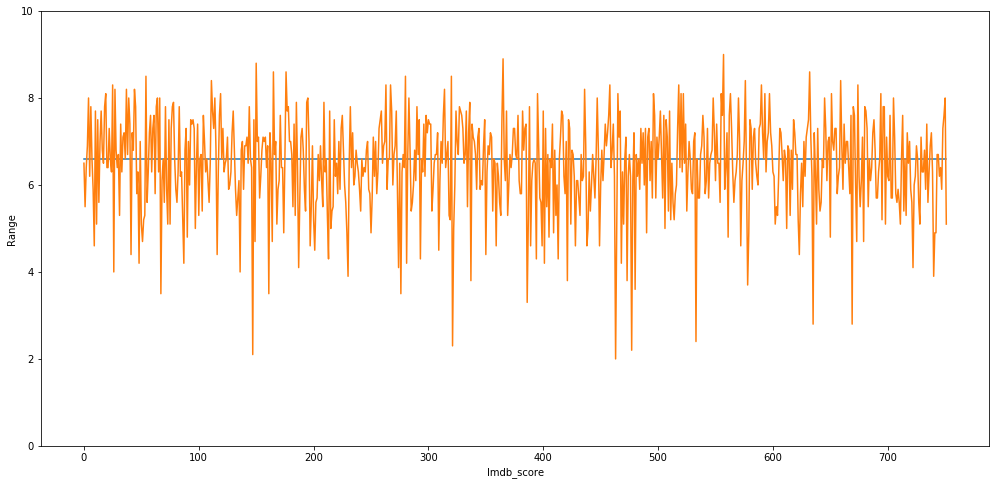

In [57]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

(19,)